# Gaurang Bharti

## How has Income Distribution and Population impacted housing prices in Vancouver?

For my project, I will be looking at the impact Income Distribution has on housing and rental prices. The expectation is to find a positive correlation that is > 0.5 as I believe the Income Distribution of a region plays a significant role in the decisions relating to pricing for houses. I believe the same to be true for Population as well

In [ ]:
import pandas as pd
file = ("../data/raw/housing-supply-price-rental.csv")

In [ ]:
dataset = pd.read_csv(file)

In [ ]:
dataset

,Unnamed: 0,year,total_dwelling,single_detached,multiple,semi_detached,row,apartment,total_dwelling_market,homeownership_freehold,...,one_bedroom,two_bedroom,three_bedroom,population,labour_participation_rate,employment_change,unemployment_rate,disposable_income_change,migration,region
0,0,1990.0,3297,2847,450,57,6,387,2274,2004.0,...,418,524,608,1105.421,67.300,0.219444,7.4,-2.669133,-5108,manitoba
1,1,1991.0,1950,1589,361,14,0,347,1438,1085.0,...,424,531,630,1109.604,67.025,-1.364064,8.6,-2.669133,-5108,manitoba
2,2,1992.0,2310,1683,627,64,10,553,1821,1383.0,...,434,545,644,1112.689,66.475,-1.351685,9.3,-0.326989,-5108,manitoba
3,3,1993.0,2425,1874,551,52,83,416,1702,1338.0,...,435,550,652,1117.618,66.850,0.766782,9.3,-0.453243,-2520,manitoba
4,4,1994.0,3197,2441,756,72,410,274,1664,1289.0,...,440,551,645,1123.230,66.750,0.774181,8.8,0.161821,-1996,manitoba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,22,2012.0,896,449,447,12,91,344,896,552.0,...,850,1005,1230,165.914,64.300,1.639344,6.7,NaN,1239,kingston
940,23,2013.0,856,325,531,8,103,420,856,436.0,...,859,1054,1463,166.950,64.900,2.481390,6.3,NaN,978,kingston
941,24,2014.0,672,338,334,26,102,206,672,462.0,...,888,1070,1411,168.164,63.600,-1.452785,6.8,NaN,1185,kingston
942,25,2015.0,655,275,380,14,53,313,655,332.0,...,915,1096,1469,169.420,64.300,1.842752,6.6,NaN,1259,kingston


### Initial comments on dataset

The dataset has quite a lot of data that's segregated by region for more granular analysis. While I don't plan to use `region` as a crucial metric right now, it can be useful later. The data is segregated by different types of houses, so we will try to do a fairly general analysis of the overall expenses - not looking at any specific type.

# Exploratory Data Analysis

In [ ]:
dataset.year.unique()

array([1990. , 1991. , 1992. , 1993. , 1994. , 1995. , 1996. , 1997. ,
       1998. , 1999. , 2000. , 2001. , 2002. , 2003. , 2004. , 2005. ,
       2006. , 2007. , 2008. , 2009. , 2010. , 2011. , 2012. , 2013. ,
       2014. , 2015. , 2016. , 1993.1])

As we're working with years, I'd like to convert these values into a datetime

In [ ]:
from datetime import datetime

#dataset = dataset[dataset['year'] != 1993.1].astype({'year': int})
#dataset['year'] = dataset['year'].transform(lambda x: datetime.strptime(str(x), '%Y'))
dataset_vanc.year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016])

In [ ]:
#Supressing some local file warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset_vanc = dataset[dataset.region == 'vancouver']
dataset_vanc['population'] = dataset_vanc['population'].multiply(1000)
dataset_vanc

,Unnamed: 0,year,total_dwelling,single_detached,multiple,semi_detached,row,apartment,total_dwelling_market,homeownership_freehold,...,one_bedroom,two_bedroom,three_bedroom,population,labour_participation_rate,employment_change,unemployment_rate,disposable_income_change,migration,region
27,0,1990.0,17970,6316,11654,607,3047,8000,17970,6425.0,...,566,751,876,1608288.0,65.6,2.457594,6.6,NaN,26077,vancouver
28,1,1991.0,14769,6991,7778,430,1429,5919,14769,7080.0,...,585,752,896,1646854.0,65.6,2.457594,6.6,NaN,26077,vancouver
29,2,1992.0,18684,7603,11081,770,2542,7769,18684,7759.0,...,594,771,902,1691289.0,65.6,2.457594,6.6,NaN,26077,vancouver
30,3,1993.0,21307,6593,14714,929,2340,11445,21307,6899.0,...,611,790,935,1736726.0,65.6,2.457594,6.6,NaN,26077,vancouver
31,4,1994.0,20473,6345,14128,822,2672,10634,20473,6627.0,...,623,812,957,1792984.0,65.6,2.457594,6.6,NaN,26077,vancouver
32,5,1995.0,14992,4526,10466,570,1686,8210,14992,4543.0,...,640,826,998,1850604.0,65.6,2.457594,6.6,NaN,26077,vancouver
33,6,1996.0,15453,5072,10381,568,1841,7972,15453,5149.0,...,661,845,991,1905312.0,65.6,2.457594,6.6,NaN,26077,vancouver
34,7,1997.0,15950,4685,11265,726,1800,8739,15950,4937.0,...,672,852,1045,1957766.0,65.6,2.457594,6.6,NaN,26077,vancouver
35,8,1998.0,11878,3373,8505,656,1261,6588,11878,3710.0,...,675,870,1005,1985550.0,65.6,2.457594,6.6,NaN,26077,vancouver
36,9,1999.0,8677,3568,5109,380,953,3776,8677,3912.0,...,683,864,993,2013081.0,65.6,2.457594,6.6,NaN,26077,vancouver


### Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[Text(0.5, 1.0, 'HPI change in Vancouver')]

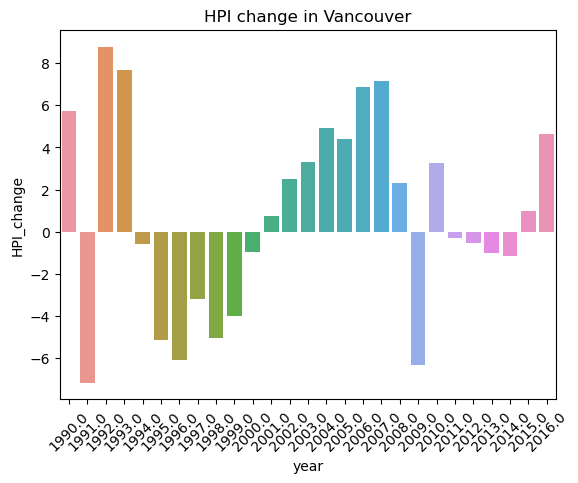

In [ ]:
plt.xticks(rotation=45)
graph = sns.barplot(data = dataset_vanc, x="year", y="HPI_change")
graph.set(title="HPI change in Vancouver")

### Comments: 
HPI (Home Price Index) is a tool that's used to analyse the price levels and trends of housing in a region. This visualisation shows us that the HPI fluctuated quite a bit since the 1990s, hinting that there are plenty of external factors that play a role. Further EDA will look at other elements of housing and how they correlate together, and we will come back to the HPI while doing the primary analysis.

<AxesSubplot:>

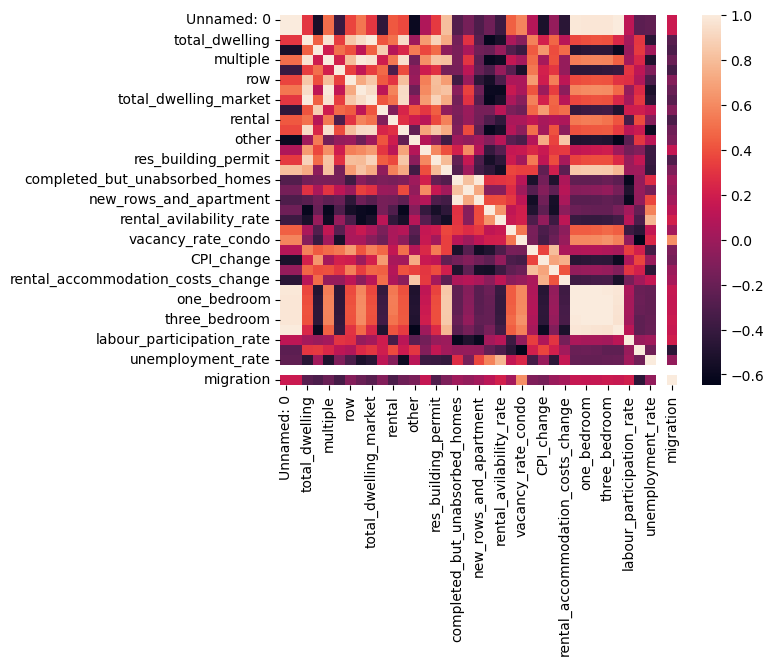

In [ ]:
sns.heatmap(dataset_vanc.corr())

### Comments:
This visualisation gives us a rounded picture of the correlations across the dataset. From first glance, it's a lot of information, but it does a great job of showing us the extent to which each variable can impact another.

<seaborn.axisgrid.JointGrid>

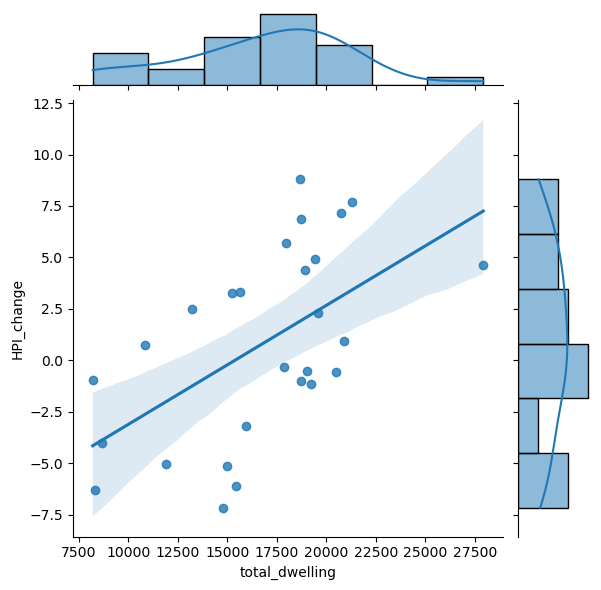

In [ ]:
sns.jointplot(data=dataset_vanc, x="total_dwelling", y="HPI_change", kind="reg")

### Comments:
This comparison shows us the correlation between Total Dwellings (Total places of livling) and the HPI. From the graph, we can see that there is a positive correlation between the two, telling us that as housing prices increase, the builders are incentivised to construct more dwellings. However, from this graph, it's difficult to tell which caused which.

In [ ]:
income_file = ("../data/raw/vancouver_income_main.csv")
income_dataset = pd.read_csv(income_file)
income_dataset

,Year,"Number of persons (x1,000)","Number with income(x1,000)","Aggregate income (x1,000,000)",Average income (excluding zeros),Median income (excluding zeros)
0,1991,1297,1207,50945,42200,33600
1,1992,1361,1269,54374,42900,33200
2,1993,1367,1286,51793,40300,31400
3,1994,1405,1312,53292,40600,31900
4,1995,1429,1340,55544,41500,32600
5,1996,1527,1438,57644,40100,30800
6,1997,1542,1456,59799,41100,31700
7,1998,1470,1414,59755,42200,32100
8,1999,1572,1490,62796,42200,30800
9,2000,1591,1524,64967,42600,30800


[Text(0.5, 1.0, 'Average Income in Vancouver')]

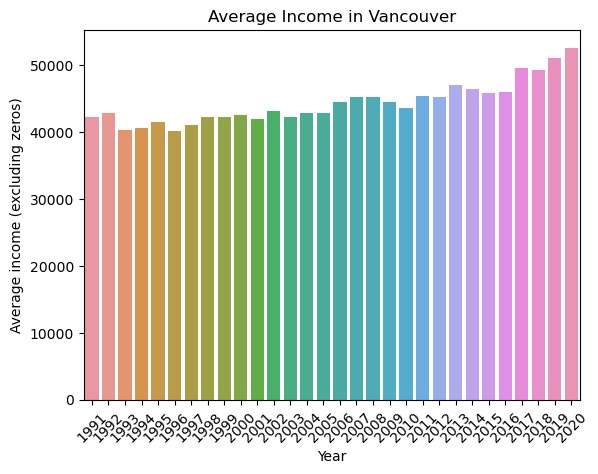

In [ ]:
plt.xticks(rotation=45)
graph = sns.barplot(data = income_dataset, x="Year", y="Average income (excluding zeros)")
graph.set(title="Average Income in Vancouver")

### Comments:
This bar graph gives us an understanding of the trend Average Income has followed in Vancouver. It has been rising consistently for quite a while now - but does not seem to follow the trends of HPI. Further analysis is needed but this is a good overview of its progression over the years.

In [ ]:
def load_and_process(path):
    df1 = (
        pd.read_csv(str(path) + "housing-supply-price-rental.csv")
        .loc[lambda x: x['region']=='vancouver']
        .reset_index(drop=True)
        .loc[:, ['year', 'population', 'region', 'HPI_change', 'CPI_change', 'completed', 'rental', 'total_dwelling', 'unemployment_rate']]
        .astype({'year': int})
        .loc[1:26]
    )
    
    df2 = (
        pd.read_csv(str(path) + "vancouver_income_main.csv")
        .set_axis(['year', 'no_of_people', 'people_with_income', 'aggre_income', 'avg_income', 'med_income'], axis=1)
        .loc[0:25]
    )
    
    df3 = (df1.merge(df2, how='inner'))
    
    return df3

In [ ]:
load_and_process("../data/raw/")

,year,population,region,HPI_change,CPI_change,completed,rental,total_dwelling,unemployment_rate,no_of_people,people_with_income,aggre_income,avg_income,med_income
0,1991,1646.854,vancouver,-7.160019,5.171306,14630,1738,14769,6.6,1297,1207,50945,42200,33600
1,1992,1691.289,vancouver,8.788820,2.931895,16487,1901,18684,6.6,1361,1269,54374,42900,33200
2,1993,1736.726,vancouver,7.679132,3.659381,19737,1435,21307,6.6,1367,1286,51793,40300,31400
3,1994,1792.984,vancouver,-0.583245,2.022708,20387,1181,20473,6.6,1405,1312,53292,40600,31900
4,1995,1850.604,vancouver,-5.155556,2.496961,19837,669,14992,6.6,1429,1340,55544,41500,32600
5,1996,1905.312,vancouver,-6.091846,0.802920,13917,715,15453,6.6,1527,1438,57644,40100,30800
6,1997,1957.766,vancouver,-3.183633,0.561188,16041,1248,15950,6.6,1542,1456,59799,41100,31700
7,1998,1985.550,vancouver,-5.061334,0.486049,13927,499,11878,6.6,1470,1414,59755,42200,32100
8,1999,2013.081,vancouver,-4.006515,0.913651,11102,988,8677,6.6,1572,1490,62796,42200,30800
9,2000,2040.832,vancouver,-0.950119,2.254571,9106,1145,8203,6.6,1591,1524,64967,42600,30800
